In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 19 17:51:42 2021

@author: wanjinyu
"""

import MLmodels
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process.kernels import RBF, DotProduct

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
def Henon(N, Nstep):
    '''
    Sample initial conditions with a grid of N*N within the range [-.3,.3]
    Track intial conditions follwing Henon map over Nstep time steps
    
    Those whose amplitudes increase infinitely is lost
    The trajectory over first 5 time steps is data feature for training
    '''
    xlist = np.linspace(-0.3,0.3,N)
    xxi = np.zeros([N**2,Nstep+1])
    yyi = np.zeros([N**2,Nstep+1])
    for i in range(N):
        for j in range(N):
            xxi[i*N+j,0] = xlist[i]
            yyi[i*N+j,0] = xlist[j]
        
    mu = 1/3
    for i in range(Nstep):
        tempx = xxi[:,i]*np.cos(mu)+(yyi[:,i]-xxi[:,i]**2)*np.sin(mu)
        tempy = -xxi[:,i]*np.sin(mu)+(yyi[:,i]-xxi[:,i]**2)*np.cos(mu)
        xxi[:,i+1] = tempx
        yyi[:,i+1] = tempy

    max_A = np.isnan(xxi[:,-1])
#    surviveid = np.where(max_A==False)[0]

    data = np.zeros([N**2,2*Nstep+2])
    for i in range(Nstep+1):
        data[:,i*2] = xxi[:,i]
        data[:,i*2+1] = yyi[:,i]
    
    TrainingData = data[:,0:12]

    label = np.ones(N**2)
    label[np.where(max_A==True)[0]] = -1
    # training labels for NN
    NNlabel = np.zeros([N**2,2])
    NNlabel[max_A,1] = 1
    NNlabel[~max_A,0] = 1
    return TrainingData, label, NNlabel, data

In [4]:
TrainingData, label, NNlabel, data = Henon(30,500)

'''randomly select training samples'''
scaler = MinMaxScaler()
TrainingData = scaler.fit_transform(TrainingData)
Ntrain = round(0.1*len(TrainingData[:,0]))
idx = np.arange(0,len(TrainingData[:,0]))
np.random.shuffle(idx)
data = data[idx,:]
label = label[idx]
NNlabel = NNlabel[idx,:]
TrainingData = TrainingData[idx,:]
TrainX = TrainingData[0:Ntrain,:]
TrainY = label[0:Ntrain]
TrainY_NN = NNlabel[0:Ntrain,:]
TrainX_unlabeled = TrainingData[Ntrain:,:]

D:\anaconda\envs\keras\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in square
D:\anaconda\envs\keras\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square
D:\anaconda\envs\keras\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in add


In [5]:
'''train ML models of RF, GP, SVM, TSVM and NN'''
ML = MLmodels.MLmodels()
ML.initialTSVM(1.5, 'rbf')
ML.initialSVM(1.5, 'rbf')
ML.initialRF()
kernel = 1.0 * RBF(1.0)
ML.initialGP(kernel)
ML.initialNN([12,64])

ML.trainTSVM(TrainX, TrainY.reshape(len(TrainY),1), TrainX_unlabeled)
ML.trainSVM(TrainX, TrainY)
ML.trainRF(TrainX, TrainY)
ML.trainGP(TrainX, TrainY)
ML.trainNN(TrainX, TrainY_NN)

Epoch 1/3000
90/90 [==============================] - 0s 2ms/step - loss: 0.2397 - mse: 0.2397
Epoch 2/3000
90/90 [==============================] - 0s 55us/step - loss: 0.2356 - mse: 0.2356
Epoch 3/3000
90/90 [==============================] - 0s 44us/step - loss: 0.2355 - mse: 0.2355
Epoch 4/3000
90/90 [==============================] - 0s 33us/step - loss: 0.2345 - mse: 0.2345
Epoch 5/3000
90/90 [==============================] - 0s 44us/step - loss: 0.2331 - mse: 0.2331
Epoch 6/3000
90/90 [==============================] - 0s 44us/step - loss: 0.2321 - mse: 0.2321
Epoch 7/3000
90/90 [==============================] - 0s 44us/step - loss: 0.2310 - mse: 0.2310
Epoch 8/3000
90/90 [==============================] - 0s 33us/step - loss: 0.2306 - mse: 0.2306
Epoch 9/3000
90/90 [==============================] - 0s 33us/step - loss: 0.2296 - mse: 0.2296
Epoch 10/3000
90/90 [==============================] - 0s 55us/step - loss: 0.2292 - mse: 0.2292
Epoch 11/3000
90/90 [===================

90/90 [==============================] - 0s 44us/step - loss: 0.1505 - mse: 0.1505
Epoch 86/3000
90/90 [==============================] - 0s 55us/step - loss: 0.1488 - mse: 0.1488
Epoch 87/3000
90/90 [==============================] - 0s 33us/step - loss: 0.1477 - mse: 0.1477
Epoch 88/3000
90/90 [==============================] - 0s 33us/step - loss: 0.1467 - mse: 0.1467
Epoch 89/3000
90/90 [==============================] - 0s 44us/step - loss: 0.1460 - mse: 0.1460
Epoch 90/3000
90/90 [==============================] - 0s 44us/step - loss: 0.1454 - mse: 0.1454
Epoch 91/3000
90/90 [==============================] - 0s 33us/step - loss: 0.1441 - mse: 0.1441
Epoch 92/3000
90/90 [==============================] - 0s 44us/step - loss: 0.1428 - mse: 0.1428
Epoch 93/3000
90/90 [==============================] - 0s 44us/step - loss: 0.1422 - mse: 0.1422
Epoch 94/3000
90/90 [==============================] - 0s 44us/step - loss: 0.1415 - mse: 0.1415
Epoch 95/3000
90/90 [=======================

90/90 [==============================] - 0s 55us/step - loss: 0.0872 - mse: 0.0872
Epoch 169/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0849 - mse: 0.0849
Epoch 170/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0854 - mse: 0.0854
Epoch 171/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0835 - mse: 0.0835
Epoch 172/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0858 - mse: 0.0858
Epoch 173/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0845 - mse: 0.0845
Epoch 174/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0826 - mse: 0.0826
Epoch 175/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0828 - mse: 0.0828
Epoch 176/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0837 - mse: 0.0837
Epoch 177/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0826 - mse: 0.0826
Epoch 178/3000
90/90 [=============

90/90 [==============================] - 0s 33us/step - loss: 0.0556 - mse: 0.0556
Epoch 252/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0560 - mse: 0.0560
Epoch 253/3000
90/90 [==============================] - 0s 56us/step - loss: 0.0550 - mse: 0.0550
Epoch 254/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0546 - mse: 0.0546
Epoch 255/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0547 - mse: 0.0547
Epoch 256/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0542 - mse: 0.0542
Epoch 257/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0539 - mse: 0.0539
Epoch 258/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0543 - mse: 0.0543
Epoch 259/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0535 - mse: 0.0535
Epoch 260/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0536 - mse: 0.0536
Epoch 261/3000
90/90 [=============

90/90 [==============================] - 0s 44us/step - loss: 0.0415 - mse: 0.0415
Epoch 335/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0411 - mse: 0.0411
Epoch 336/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0421 - mse: 0.0421
Epoch 337/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0410 - mse: 0.0410
Epoch 338/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0426 - mse: 0.0426
Epoch 339/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0419 - mse: 0.0419
Epoch 340/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0411 - mse: 0.0411
Epoch 341/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0404 - mse: 0.0404
Epoch 342/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0407 - mse: 0.0407
Epoch 343/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0401 - mse: 0.0401
Epoch 344/3000
90/90 [=============

90/90 [==============================] - 0s 44us/step - loss: 0.0334 - mse: 0.0334
Epoch 418/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0340 - mse: 0.0340
Epoch 419/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0337 - mse: 0.0337
Epoch 420/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0332 - mse: 0.0332
Epoch 421/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0338 - mse: 0.0338
Epoch 422/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0342 - mse: 0.0342
Epoch 423/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0344 - mse: 0.0344
Epoch 424/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0330 - mse: 0.0330
Epoch 425/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0350 - mse: 0.0350
Epoch 426/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0329 - mse: 0.0329
Epoch 427/3000
90/90 [=============

90/90 [==============================] - 0s 33us/step - loss: 0.0299 - mse: 0.0299
Epoch 501/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0293 - mse: 0.0293
Epoch 502/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0301 - mse: 0.0301
Epoch 503/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0324 - mse: 0.0324
Epoch 504/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0298 - mse: 0.0298
Epoch 505/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0284 - mse: 0.0284
Epoch 506/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0292 - mse: 0.0292
Epoch 507/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0285 - mse: 0.0285
Epoch 508/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0283 - mse: 0.0283
Epoch 509/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0282 - mse: 0.0282
Epoch 510/3000
90/90 [=============

90/90 [==============================] - 0s 44us/step - loss: 0.0269 - mse: 0.0269
Epoch 584/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0255 - mse: 0.0255
Epoch 585/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0266 - mse: 0.0266
Epoch 586/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0273 - mse: 0.0273
Epoch 587/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0256 - mse: 0.0256
Epoch 588/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0257 - mse: 0.0257
Epoch 589/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0252 - mse: 0.0252
Epoch 590/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0255 - mse: 0.0255
Epoch 591/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0253 - mse: 0.0253
Epoch 592/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0252 - mse: 0.0252
Epoch 593/3000
90/90 [=============

90/90 [==============================] - 0s 33us/step - loss: 0.0237 - mse: 0.0237
Epoch 667/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0230 - mse: 0.0230
Epoch 668/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0234 - mse: 0.0234
Epoch 669/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0238 - mse: 0.0238
Epoch 670/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0231 - mse: 0.0231
Epoch 671/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0230 - mse: 0.0230
Epoch 672/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0231 - mse: 0.0231
Epoch 673/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0235 - mse: 0.0235
Epoch 674/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0232 - mse: 0.0232
Epoch 675/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0236 - mse: 0.0236
Epoch 676/3000
90/90 [=============

90/90 [==============================] - 0s 33us/step - loss: 0.0221 - mse: 0.0221
Epoch 750/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0214 - mse: 0.0214
Epoch 751/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0226 - mse: 0.0226
Epoch 752/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0219 - mse: 0.0219
Epoch 753/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0221 - mse: 0.0221
Epoch 754/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0210 - mse: 0.0210
Epoch 755/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0224 - mse: 0.0224
Epoch 756/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0216 - mse: 0.0216
Epoch 757/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0241 - mse: 0.0241
Epoch 758/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0242 - mse: 0.0242
Epoch 759/3000
90/90 [=============

90/90 [==============================] - 0s 33us/step - loss: 0.0218 - mse: 0.0218
Epoch 833/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0203 - mse: 0.0203
Epoch 834/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0209 - mse: 0.0209
Epoch 835/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0193 - mse: 0.0193
Epoch 836/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0209 - mse: 0.0209
Epoch 837/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0199 - mse: 0.0199
Epoch 838/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0202 - mse: 0.0202
Epoch 839/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0203 - mse: 0.0203
Epoch 840/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0215 - mse: 0.0215
Epoch 841/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0207 - mse: 0.0207
Epoch 842/3000
90/90 [=============

90/90 [==============================] - 0s 33us/step - loss: 0.0207 - mse: 0.0207
Epoch 916/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0181 - mse: 0.0181
Epoch 917/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0218 - mse: 0.0218
Epoch 918/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0196 - mse: 0.0196
Epoch 919/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0189 - mse: 0.0189
Epoch 920/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0202 - mse: 0.0202
Epoch 921/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0185 - mse: 0.0185
Epoch 922/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0226 - mse: 0.0226
Epoch 923/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0197 - mse: 0.0197
Epoch 924/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0195 - mse: 0.0195
Epoch 925/3000
90/90 [=============

90/90 [==============================] - 0s 44us/step - loss: 0.0184 - mse: 0.0184
Epoch 999/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0176 - mse: 0.0176
Epoch 1000/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0171 - mse: 0.0171
Epoch 1001/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0184 - mse: 0.0184
Epoch 1002/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0194 - mse: 0.0194
Epoch 1003/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0176 - mse: 0.0176
Epoch 1004/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0180 - mse: 0.0180
Epoch 1005/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0180 - mse: 0.0180
Epoch 1006/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0197 - mse: 0.0197
Epoch 1007/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0190 - mse: 0.0190
Epoch 1008/3000
90/90 [====

90/90 [==============================] - 0s 33us/step - loss: 0.0163 - mse: 0.0163
Epoch 1081/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0176 - mse: 0.0176
Epoch 1082/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0162 - mse: 0.0162
Epoch 1083/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0169 - mse: 0.0169
Epoch 1084/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0169 - mse: 0.0169
Epoch 1085/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0183 - mse: 0.0183
Epoch 1086/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0198 - mse: 0.0198
Epoch 1087/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0178 - mse: 0.0178
Epoch 1088/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0161 - mse: 0.0161
Epoch 1089/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0174 - mse: 0.0174
Epoch 1090/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0165 - mse: 0.0165
Epoch 1163/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0162 - mse: 0.0162
Epoch 1164/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0151 - mse: 0.0151
Epoch 1165/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0180 - mse: 0.0180
Epoch 1166/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0192 - mse: 0.0192
Epoch 1167/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0179 - mse: 0.0179
Epoch 1168/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0156 - mse: 0.0156
Epoch 1169/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0176 - mse: 0.0176
Epoch 1170/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0178 - mse: 0.0178
Epoch 1171/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0164 - mse: 0.0164
Epoch 1172/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0153 - mse: 0.0153
Epoch 1245/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0152 - mse: 0.0152
Epoch 1246/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0155 - mse: 0.0155
Epoch 1247/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0157 - mse: 0.0157
Epoch 1248/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0152 - mse: 0.0152
Epoch 1249/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0176 - mse: 0.0176
Epoch 1250/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0162 - mse: 0.0162
Epoch 1251/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0160 - mse: 0.0160
Epoch 1252/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0166 - mse: 0.0166
Epoch 1253/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0154 - mse: 0.0154
Epoch 1254/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0137 - mse: 0.0137
Epoch 1327/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0137 - mse: 0.0137
Epoch 1328/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0139 - mse: 0.0139
Epoch 1329/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0136 - mse: 0.0136
Epoch 1330/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0167 - mse: 0.0167
Epoch 1331/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0138 - mse: 0.0138
Epoch 1332/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0141 - mse: 0.0141
Epoch 1333/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0140 - mse: 0.0140
Epoch 1334/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0147 - mse: 0.0147
Epoch 1335/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0162 - mse: 0.0162
Epoch 1336/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0158 - mse: 0.0158
Epoch 1409/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0133 - mse: 0.0133
Epoch 1410/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0126 - mse: 0.0126
Epoch 1411/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0138 - mse: 0.0138
Epoch 1412/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0139 - mse: 0.0139
Epoch 1413/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0140 - mse: 0.0140
Epoch 1414/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0124 - mse: 0.0124
Epoch 1415/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0135 - mse: 0.0135
Epoch 1416/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0131 - mse: 0.0131
Epoch 1417/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0123 - mse: 0.0123
Epoch 1418/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0118 - mse: 0.0118
Epoch 1491/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0124 - mse: 0.0124
Epoch 1492/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0120 - mse: 0.0120
Epoch 1493/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0134 - mse: 0.0134
Epoch 1494/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0131 - mse: 0.0131
Epoch 1495/3000
90/90 [==============================] - ETA: 0s - loss: 0.0235 - mse: 0.023 - 0s 33us/step - loss: 0.0119 - mse: 0.0119
Epoch 1496/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0122 - mse: 0.0122
Epoch 1497/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0127 - mse: 0.0127
Epoch 1498/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0120 - mse: 0.0120
Epoch 1499/3000
90/90 [==============================] - 0s 34us/step - loss: 0.0127 - 

90/90 [==============================] - 0s 44us/step - loss: 0.0114 - mse: 0.0114
Epoch 1573/3000
90/90 [==============================] - 0s 56us/step - loss: 0.0141 - mse: 0.0141
Epoch 1574/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0124 - mse: 0.0124
Epoch 1575/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0129 - mse: 0.0129
Epoch 1576/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0114 - mse: 0.0114
Epoch 1577/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0123 - mse: 0.0123
Epoch 1578/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0108 - mse: 0.0108
Epoch 1579/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0114 - mse: 0.0114
Epoch 1580/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0114 - mse: 0.0114
Epoch 1581/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0119 - mse: 0.0119
Epoch 1582/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0111 - mse: 0.0111
Epoch 1655/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0112 - mse: 0.0112
Epoch 1656/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0107 - mse: 0.0107
Epoch 1657/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0103 - mse: 0.0103
Epoch 1658/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0113 - mse: 0.0113
Epoch 1659/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0112 - mse: 0.0112
Epoch 1660/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0109 - mse: 0.0109
Epoch 1661/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0116 - mse: 0.0116
Epoch 1662/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0105 - mse: 0.0105
Epoch 1663/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0123 - mse: 0.0123
Epoch 1664/3000
90/90 [===

90/90 [==============================] - 0s 33us/step - loss: 0.0099 - mse: 0.0099
Epoch 1737/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0098 - mse: 0.0098
Epoch 1738/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0128 - mse: 0.0128
Epoch 1739/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0147 - mse: 0.0147
Epoch 1740/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0135 - mse: 0.0135
Epoch 1741/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0138 - mse: 0.0138
Epoch 1742/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0111 - mse: 0.0111
Epoch 1743/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0088 - mse: 0.0088
Epoch 1744/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0102 - mse: 0.0102
Epoch 1745/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0094 - mse: 0.0094
Epoch 1746/3000
90/90 [===

90/90 [==============================] - 0s 34us/step - loss: 0.0098 - mse: 0.0098
Epoch 1819/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0116 - mse: 0.0116
Epoch 1820/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0113 - mse: 0.0113
Epoch 1821/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0120 - mse: 0.0120
Epoch 1822/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0090 - mse: 0.0090
Epoch 1823/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0106 - mse: 0.0106
Epoch 1824/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0152 - mse: 0.0152
Epoch 1825/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0129 - mse: 0.0129
Epoch 1826/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0087 - mse: 0.0087
Epoch 1827/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0100 - mse: 0.0100
Epoch 1828/3000
90/90 [===

90/90 [==============================] - 0s 45us/step - loss: 0.0092 - mse: 0.0092
Epoch 1901/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0079 - mse: 0.0079
Epoch 1902/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0094 - mse: 0.0094
Epoch 1903/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0078 - mse: 0.0078
Epoch 1904/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0099 - mse: 0.0099
Epoch 1905/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0084 - mse: 0.0084
Epoch 1906/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0093 - mse: 0.0093
Epoch 1907/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0081 - mse: 0.0081   
Epoch 1908/3000
90/90 [==============================] - 0s 34us/step - loss: 0.0097 - mse: 0.0097
Epoch 1909/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0098 - mse: 0.0098
Epoch 1910/3000
90/90 [

90/90 [==============================] - 0s 44us/step - loss: 0.0086 - mse: 0.0086
Epoch 1982/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0080 - mse: 0.0080
Epoch 1983/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0082 - mse: 0.0082
Epoch 1984/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0076 - mse: 0.0076
Epoch 1985/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0082 - mse: 0.0082
Epoch 1986/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0075 - mse: 0.0075
Epoch 1987/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0093 - mse: 0.0093
Epoch 1988/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0083 - mse: 0.0083
Epoch 1989/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0077 - mse: 0.0077
Epoch 1990/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0086 - mse: 0.0086
Epoch 1991/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0082 - mse: 0.0082
Epoch 2064/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0077 - mse: 0.0077
Epoch 2065/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0092 - mse: 0.0092
Epoch 2066/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0072 - mse: 0.0072
Epoch 2067/3000
90/90 [==============================] - ETA: 0s - loss: 0.0171 - mse: 0.017 - 0s 33us/step - loss: 0.0084 - mse: 0.0084
Epoch 2068/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0085 - mse: 0.0085
Epoch 2069/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0091 - mse: 0.0091
Epoch 2070/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0090 - mse: 0.0090
Epoch 2071/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0091 - mse: 0.0091   
Epoch 2072/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0067

90/90 [==============================] - 0s 33us/step - loss: 0.0074 - mse: 0.0074
Epoch 2146/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0067 - mse: 0.0067
Epoch 2147/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0077 - mse: 0.0077
Epoch 2148/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0060 - mse: 0.0060   
Epoch 2149/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0091 - mse: 0.0091
Epoch 2150/3000
90/90 [==============================] - 0s 34us/step - loss: 0.0064 - mse: 0.0064
Epoch 2151/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0081 - mse: 0.0081
Epoch 2152/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0052 - mse: 0.0052
Epoch 2153/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0093 - mse: 0.0093
Epoch 2154/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0100 - mse: 0.0100
Epoch 2155/3000
90/90 [

90/90 [==============================] - 0s 44us/step - loss: 0.0059 - mse: 0.0059
Epoch 2228/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0072 - mse: 0.0072
Epoch 2229/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0052 - mse: 0.0052
Epoch 2230/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0062 - mse: 0.0062
Epoch 2231/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0065 - mse: 0.0065
Epoch 2232/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0060 - mse: 0.0060
Epoch 2233/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0060 - mse: 0.0060
Epoch 2234/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0059 - mse: 0.0059
Epoch 2235/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0062 - mse: 0.0062
Epoch 2236/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0062 - mse: 0.0062
Epoch 2237/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0050 - mse: 0.0050
Epoch 2310/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0052 - mse: 0.0052
Epoch 2311/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0051 - mse: 0.0051
Epoch 2312/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0053 - mse: 0.0053
Epoch 2313/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0053 - mse: 0.0053
Epoch 2314/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0059 - mse: 0.0059
Epoch 2315/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0051 - mse: 0.0051
Epoch 2316/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0052 - mse: 0.0052
Epoch 2317/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0055 - mse: 0.0055
Epoch 2318/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0061 - mse: 0.0061
Epoch 2319/3000
90/90 [===

90/90 [==============================] - 0s 33us/step - loss: 0.0071 - mse: 0.0071   
Epoch 2392/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0080 - mse: 0.0080
Epoch 2393/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0085 - mse: 0.0085
Epoch 2394/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0066 - mse: 0.0066
Epoch 2395/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0073 - mse: 0.0073
Epoch 2396/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0053 - mse: 0.0053   
Epoch 2397/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0062 - mse: 0.0062
Epoch 2398/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0051 - mse: 0.0051   
Epoch 2399/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0085 - mse: 0.0085
Epoch 2400/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0092 - mse: 0.0092
Epoch 2401/3000
9

90/90 [==============================] - 0s 33us/step - loss: 0.0042 - mse: 0.0042
Epoch 2474/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0046 - mse: 0.0046
Epoch 2475/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0046 - mse: 0.0046
Epoch 2476/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0050 - mse: 0.0050
Epoch 2477/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0041 - mse: 0.0041
Epoch 2478/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0072 - mse: 0.0072
Epoch 2479/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0044 - mse: 0.0044
Epoch 2480/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0060 - mse: 0.0060   
Epoch 2481/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0034 - mse: 0.0034
Epoch 2482/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0074 - mse: 0.0074
Epoch 2483/3000
90/90 [

90/90 [==============================] - 0s 33us/step - loss: 0.0047 - mse: 0.0047   
Epoch 2556/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0039 - mse: 0.0039
Epoch 2557/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0056 - mse: 0.0056
Epoch 2558/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0042 - mse: 0.0042   
Epoch 2559/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0043 - mse: 0.0043
Epoch 2560/3000
90/90 [==============================] - 0s 55us/step - loss: 0.0043 - mse: 0.0043
Epoch 2561/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0042 - mse: 0.0042
Epoch 2562/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0035 - mse: 0.0035
Epoch 2563/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0045 - mse: 0.0045
Epoch 2564/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0039 - mse: 0.0039
Epoch 2565/3000
90/9

90/90 [==============================] - 0s 33us/step - loss: 0.0038 - mse: 0.0038
Epoch 2638/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0031 - mse: 0.0031
Epoch 2639/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0047 - mse: 0.0047   
Epoch 2640/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0081 - mse: 0.0081
Epoch 2641/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0041 - mse: 0.0041
Epoch 2642/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0042 - mse: 0.0042
Epoch 2643/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0046 - mse: 0.0046
Epoch 2644/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0035 - mse: 0.0035
Epoch 2645/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0038 - mse: 0.0038
Epoch 2646/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0040 - mse: 0.0040
Epoch 2647/3000
90/90 [

90/90 [==============================] - 0s 44us/step - loss: 0.0029 - mse: 0.0029
Epoch 2720/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0038 - mse: 0.0038
Epoch 2721/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0039 - mse: 0.0039
Epoch 2722/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0043 - mse: 0.0043
Epoch 2723/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0036 - mse: 0.0036
Epoch 2724/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0030 - mse: 0.0030
Epoch 2725/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0030 - mse: 0.0030
Epoch 2726/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0030 - mse: 0.0030
Epoch 2727/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0036 - mse: 0.0036
Epoch 2728/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0032 - mse: 0.0032
Epoch 2729/3000
90/90 [===

90/90 [==============================] - 0s 44us/step - loss: 0.0026 - mse: 0.0026
Epoch 2802/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0027 - mse: 0.0027
Epoch 2803/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0029 - mse: 0.0029
Epoch 2804/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0034 - mse: 0.0034
Epoch 2805/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0034 - mse: 0.0034   
Epoch 2806/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0029 - mse: 0.0029
Epoch 2807/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0028 - mse: 0.0028
Epoch 2808/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0022 - mse: 0.0022
Epoch 2809/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0030 - mse: 0.0030
Epoch 2810/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0029 - mse: 0.0029
Epoch 2811/3000
90/90 [

90/90 [==============================] - 0s 44us/step - loss: 0.0065 - mse: 0.0065
Epoch 2883/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0067 - mse: 0.0067
Epoch 2884/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0029 - mse: 0.0029
Epoch 2885/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0088 - mse: 0.0088   
Epoch 2886/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0037 - mse: 0.0037
Epoch 2887/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0079 - mse: 0.0079
Epoch 2888/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0084 - mse: 0.0084   
Epoch 2889/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0017 - mse: 0.0017   
Epoch 2890/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0043 - mse: 0.0043
Epoch 2891/3000
90/90 [==============================] - ETA: 0s - loss: 0.0065 - mse: 0.006 - 0s 33us/step - loss: 

90/90 [==============================] - 0s 33us/step - loss: 0.0027 - mse: 0.0027
Epoch 2964/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0020 - mse: 0.0020   
Epoch 2965/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0023 - mse: 0.0023   
Epoch 2966/3000
90/90 [==============================] - 0s 45us/step - loss: 0.0021 - mse: 0.0021
Epoch 2967/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0024 - mse: 0.0024
Epoch 2968/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0021 - mse: 0.0021
Epoch 2969/3000
90/90 [==============================] - 0s 33us/step - loss: 0.0023 - mse: 0.0023
Epoch 2970/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0029 - mse: 0.0029
Epoch 2971/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0022 - mse: 0.0022
Epoch 2972/3000
90/90 [==============================] - 0s 44us/step - loss: 0.0051 - mse: 0.0051
Epoch 2973/3000
90/9

In [6]:
'''predict'''
TSVM_y = ML.predict(ML.TSVM,TrainingData)
SVM_y = ML.predict(ML.SVM,TrainingData)
RF_y = ML.predict(ML.rfc,TrainingData)
GP_y = ML.predict(ML.gpc,TrainingData)
NN_pre = ML.predict(ML.NN,TrainingData)
NN_y = np.argmax(NN_pre,1)
NN_y[np.where(NN_y==1)[0]] = -1
NN_y[np.where(NN_y==0)[0]] = 1

Text(0.5, 1.0, 'Surviving initial conditions')

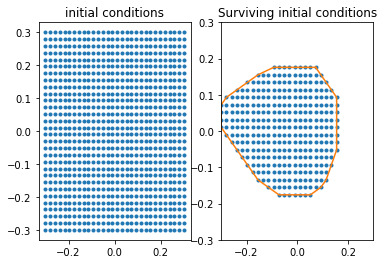

In [7]:
'''plot tracking results'''
# envelope
hull = ConvexHull(data[np.where(label==1)[0],0:2])
hull1 = hull.vertices.tolist()
hull1.append(hull1[0])

plt.figure(1)
plt.subplot(121)
plt.plot(data[:,0],data[:,1],'.')
plt.title('initial conditions')
plt.subplot(122)
plt.plot(data[np.where(label==1)[0],0],data[np.where(label==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.xlim([-0.3,0.3])
plt.ylim([-0.3,0.3])
plt.title('Surviving initial conditions')

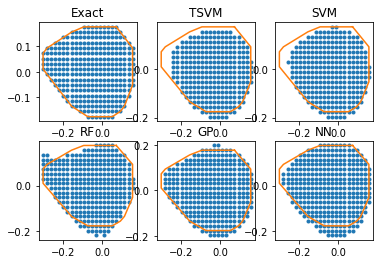

In [8]:
'''plot predicted results'''
plt.figure(2)

plt.subplot(231)
plt.plot(data[np.where(label==1)[0],0],data[np.where(label==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.title('Exact')

plt.subplot(232)
plt.plot(data[np.where(TSVM_y==1)[0],0],data[np.where(TSVM_y==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.title('TSVM')

plt.subplot(233)
plt.plot(data[np.where(SVM_y==1)[0],0],data[np.where(SVM_y==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.title('SVM')

plt.subplot(234)
plt.plot(data[np.where(RF_y==1)[0],0],data[np.where(RF_y==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.title('RF')

plt.subplot(235)
plt.plot(data[np.where(GP_y==1)[0],0],data[np.where(GP_y==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.title('GP')

plt.subplot(236)
plt.plot(data[np.where(NN_y==1)[0],0],data[np.where(NN_y==1)[0],1],'.')
plt.plot(data[np.where(label==1)[0],0][hull1],data[np.where(label==1)[0],1][hull1])
plt.title('NN')
plt.show()